<a href="https://colab.research.google.com/github/Ordaz-Yerikendy/Metodos-Numericos/blob/main/Polinomio%20Osculante%20de%20Hermite%20con%20Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def hermite_interpolation(data):
    """
    Calcula el polinomio de interpolación osculante de Hermite y lo grafica.

    Args:
        data (list): Lista de tuplas con los datos. Cada tupla debe ser de la forma:
                     (xi, f(xi), [f'(xi), f''(xi), ...]) donde xi es la coordenada,
                     f(xi) es el valor de la función en xi, y las derivadas son opcionales.

    Returns:
        sympy.Expr: El polinomio osculante de Hermite en forma simbólica.
    """
    # Variables simbólicas
    x = sp.symbols('x')

    # Nodos extendidos y tabla dividida de diferencias
    z = []  # Nodos extendidos
    Q = []  # Tabla dividida

    # Construcción de la tabla de Hermite
    for d in data:
        xi, fi, *derivatives = d
        z.append(xi)  # Primer nodo para f(xi)
        Q.append([fi])

        if derivatives:
            for d_idx, f_derivative in enumerate(derivatives[0], start=1):
                z.append(xi)  # Nodo repetido para derivadas
                Q.append([f_derivative])

    # Completar la tabla de diferencias divididas
    n = len(z)
    for i in range(1, n):
        for j in range(n - i):
            if z[j] == z[j + i]:
                # Diferencia dividida para derivadas
                Q[j].append(sp.diff(Q[j][0], x, i) / sp.factorial(i))
            else:
                # Diferencia dividida general
                diff = (Q[j + 1][i - 1] - Q[j][i - 1]) / (z[j + i] - z[j])
                Q[j].append(diff)

  # Construcción del polinomio
    polynomial = Q[0][0]
    for i in range(1, n):
        term = Q[0][i]
        for j in range(i):
            term *= (x - z[j])
        polynomial += term


    # Simplificar el polinomio
    polynomial = sp.simplify(polynomial)

# Graficar
    f_lambdified = sp.lambdify(x, polynomial, modules=['numpy'])
    z_unique = sorted(set(z))  # Eliminar duplicados para graficar nodos
    x_vals = np.linspace(min(z_unique) - 1, max(z_unique) + 1, 500)
    y_vals = f_lambdified(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label="Polinomio de Hermite", color="purple")

    # Graficar los puntos originales
    for d in data:
        xi, fi, *_ = d
        plt.scatter(xi, fi, color="magenta", label="Datos originales" if xi == data[0][0] else "")

    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    plt.title("Interpolación de Hermite")
    plt.legend()
    plt.grid(color="pink", linestyle="--")
    plt.show()

    return polynomial

In [43]:
# Solicitar datos al usuario
def solicitar_datos():
    """
    Solicita al usuario los datos para construir la interpolación de Hermite.

    Returns:
        list: Lista de datos ingresados por el usuario.
    """
    print("Ingrese los datos para la interpolación de Hermite.")
    print("Para cada punto, proporcione en el formato: x f(x) [f'(x) f''(x) ...]")
    print("Ejemplo: 0 1 0  (para x=0, f(0)=1, f'(0)=0)")
    print("Cuando haya terminado, escriba 'fin'.")

    datos = []
    while True:
        entrada = input("Ingrese un punto: ")
        if entrada.lower() == 'fin':
            break
        valores = entrada.split()
        try:
            xi = float(valores[0])
            fi = float(valores[1])
            derivadas = [float(d) for d in valores[2:]] if len(valores) > 2 else []
            datos.append((xi, fi, derivadas))
        except ValueError:
            print("Entrada no válida. Intente de nuevo.")

    return datos

Ingrese los datos para la interpolación de Hermite.
Para cada punto, proporcione en el formato: x f(x) [f'(x) f''(x) ...]
Ejemplo: 0 1 0  (para x=0, f(0)=1, f'(0)=0)
Cuando haya terminado, escriba 'fin'.
Ingrese un punto: 2 7 9 40
Ingrese un punto: 60 80 90 38
Ingrese un punto: 29 79 64 37
Ingrese un punto: 10 31 47 28
Ingrese un punto: fin


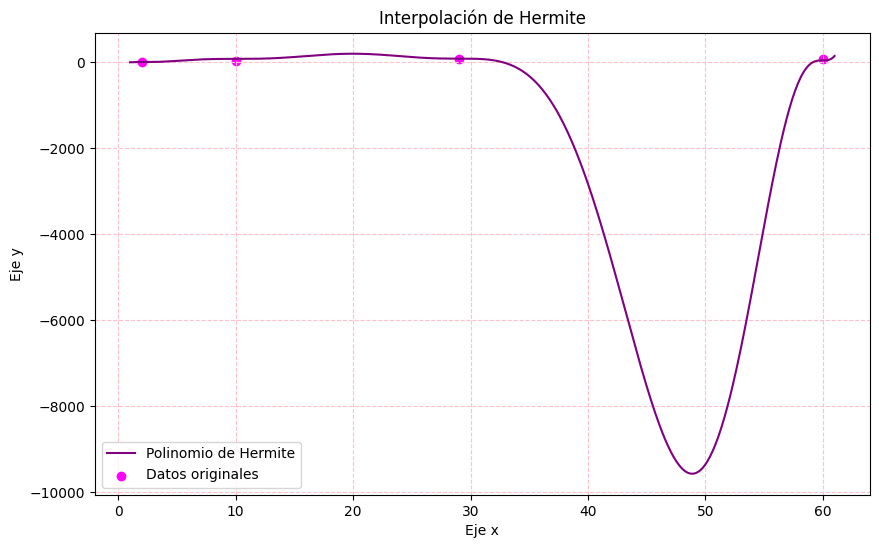

Polinomio de Hermite: 6.47134085359795e-12*x**11 - 1.92807044644128e-9*x**10 + 2.43151524713823e-7*x**9 - 1.69565698537257e-5*x**8 + 0.000717764360771077*x**7 - 0.0190759910766868*x**6 + 0.318417915707736*x**5 - 3.24769021704534*x**4 + 19.0625815576021*x**3 - 57.779169425086*x**2 + 84.1761976562942*x - 39.8294919628612


In [44]:
# Programa principal
def main():
    datos = solicitar_datos()
    if not datos:
        print("No se ingresaron datos.")
        return


    polinomio = hermite_interpolation(datos)
    print("Polinomio de Hermite:", polinomio)

if __name__ == "__main__":
    main()


Elaborado por: Yerikendy Ordaz